In [1]:
import sys, os
clones_path = os.path.abspath('..')
if clones_path not in sys.path:
    sys.path.insert(0, clones_path)

In [2]:
from growth.sweep.sweep import Sweep
from clones.spatial.graphs import Graph

In [3]:
ls /Users/Sebi/Documents/grad_school/research/growth/simulations/

sweep_111918_main/       sweep_111918_new_format/ sweep_focused/


In [4]:
sweep_path = '/Users/Sebi/Documents/grad_school/research/growth/simulations/sweep_focused'

In [5]:
sweep = Sweep.load(sweep_path)

In [6]:
sim=sweep[0]

In [8]:
#sweep.aggregate()

In [8]:
simulation = sweep[5]

In [9]:
import matplotlib.pyplot as plt

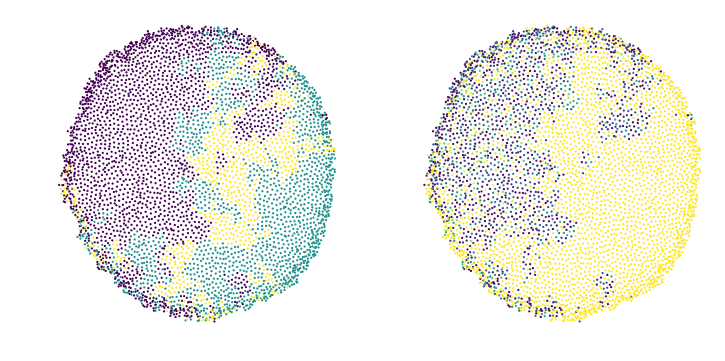

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
simulation.plot(ax=axes[0], colorby='genotype', s=5, cmap=plt.cm.viridis)
simulation.plot(ax=axes[1], colorby='phenotype', s=5, cmap=plt.cm.viridis)
for ax in axes:
    ax.axis('off')

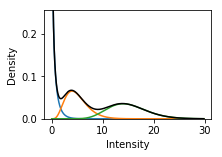

In [11]:
simulation.fluorescence.show_pdf()

In [31]:
from pomegranate import GammaDistribution, GeneralMixtureModel
from pomegranate import NormalDistribution, PoissonDistribution, LogNormalDistribution
import numpy as np

In [35]:
X = simulation.phenotypes.reshape(-1, 1)
model = GeneralMixtureModel.from_samples(LogNormalDistribution, n_components=3, X=X)

In [36]:
samples = model.sample(10000)

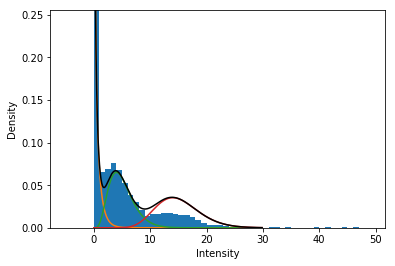

In [37]:
fig, ax = plt.subplots()
_ = ax.hist(samples, bins=np.arange(-5, 50), density=True)
simulation.fluorescence.show_pdf(ax=ax)

In [24]:
fro

(0.5, 5, 15)

In [43]:
from scipy.stats import lognorm, gamma

In [62]:
def fit_model(phenotypes):
    model = GeneralMixtureModel.from_samples(GammaDistribution, n_components=3, X=phenotypes)
    return model

In [112]:
model = GeneralMixtureModel.from_samples(ExponentialDistribution, 3, X)

In [114]:
GammaDistribution.from_samples(X)

ValueError: shapes (4221,1) and (4221,1) not aligned: 1 (dim 1) != 4221 (dim 0)

In [16]:
import numpy as np

In [17]:
#from growth.fluorescence.fluorescence import Fluorescence, FluorescenceLogNormal
import scipy.stats as st

In [37]:
import matplotlib.pyplot as plt

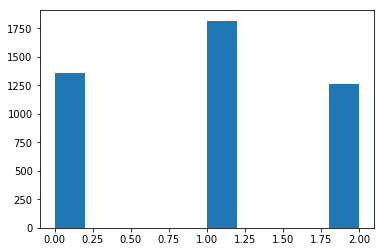

In [111]:
sim = sweep[0]
_ = plt.hist(sim.genotypes,)

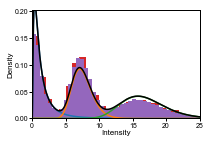

In [218]:
fl = FluorescenceLogNormal(mu=(0, 2, 2.8), sigma=(1, .2, .2))
fl.show_pdf()
ax = plt.gca()
ax.set_xlim(0, 25)


X = fl.sample(sim.genotypes).reshape(-1, 1)

_ = ax.hist(X, density=True, bins=np.arange(0, 100, 1))

model = GeneralMixtureModel.from_samples(LogNormalDistribution, 3, X)
xx = model.sample(n=100000)
_ = ax.hist(xx, bins=100, density=True)

In [219]:
from pomegranate import GeneralMixtureModel, LogNormalDistribution

In [183]:
genotype_to_model = dict(enumerate(np.argsort([d.parameters[0] for d in model.distributions])))
genotype_to_model = np.vectorize({v: k for k,v in genotype_to_model.items()}.get)
Y = genotype_to_model(model.predict(X))

In [185]:
(Y == sim.genotypes).sum()

48

In [156]:
from clones.annotation.validation import AdjacencyMatrix, Scoring
import pandas as pd

In [155]:
Scoring(sim.genotypes, Y)

ValueError: DataFrame constructor not properly called!

In [166]:
d = dict(measured=sim.genotypes, predicted=Y)

In [167]:
pd.DataFrame(d)

,measured,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [170]:
np.linspace(0., .9, num=10)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])